<a href="https://colab.research.google.com/github/myGithubAccount26/Biostatistics/blob/master/Biostatistics_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2

# Turning biology into mathematics

In this lab demonstration we will access the uniprot database and create a new dataset. Our dataset will consist of four thousand proteins, half associated with the keyword antibody and the other half not related to the keyword. The proteins are represented by their primary structure sequence of amino acids, in other words each protein is a string of letters representing each amino acid in the sequence. (Don't worry if these ideas are new to you.)

The one-letter and three-letter codes for amino acids used in the knowledgebase are those adopted by the commission on Biochemical Nomenclature of the IUPAC-IUB

One-letter code	Three-letter code	Amino-acid name

A	Ala	  Alanine

R	Arg	  Arginine

N	Asn	  Asparagine

D	Asp	  Aspartic acid

C	Cys	  Cysteine

Q	Gln	  Glutamine

E	Glu	  Glutamic acid

G	Gly	  Glycine

H	His	  Histidine

I	Ile	  Isoleucine

L	Leu	  Leucine

K	Lys	  Lysine

M	Met	  Methionine

F	Phe	  Phenylalanine

P	Pro	  Proline

S	Ser	  Serine

T	Thr	  Threonine

W	Trp	  Tryptophan

Y	Tyr	  Tyrosine

V	Val	  Valine

O	Pyl	  Pyrrolysine

U	Sec	  Selenocysteine

B	Asx	  Aspartic acid or Asparagine

Z	Glx	  Glutamic acid or Glutamine

X	Xaa	  Any amino acid


In [1]:
!pip install git+https://github.com/williamedwardhahn/mpcr # This is connecting to git and importing all functions from specific package (mpcr) from a git repository (https://github.com/williamedwardhahn/)
from mpcr import *

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-rksswyj1
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-rksswyj1
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=5914 sha256=59ee89fecace6b0ca4394c98eb72da1a5bddf00b2ab28bd49f70d2752324639e
  Stored in directory: /tmp/pip-ephem-wheel-cache-e26om4r4/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR


In [2]:
# This code will create a dataset from the uniprot database
X, Y = get_uniprot_data('=antibody', '!antibody', 2000) # assigns 2000 values to X and to Y associated with 'antibody' and not associated with 'antibody' respectively

In [ ]:
# Checking the length of the X list and Y list to make sure that they have the correct number of proteins (2000 each)
number_X = len(X)
number_Y = len(Y)

In [ ]:
print(number_X)
print(number_Y)

2000
2000


In [ ]:
X[0] #Amino acid sequence of the first protein on the list of proteins associated with 'antibody'

'mvllrvlilllswvaglggqygnplnkyirhyeglsydvdslhqkhqrakravshedqflrldfhahgrhfnlrmkrdtslfseefrvetsnavldydtshiytghiygeegsfshgsvidgrfegfiqthggtfyvepaeryikdrtlpfhsviyheddikyphkygpqggcadhsvfermrkyqmtgveevtqtpqekhaingpellrkkrttvaekntcqlyiqtdhlffkyygtreaviaqisshvkaidtiyqttdfsgirnisfmvkririnttadekdptnpfrfpnigvekflelnseqnhddyclayvftdrdfddgvlglawvgapsgssggiceksklysdgkkkslntgiitvqnygshvppkvshitfahevghnfgsphdsgtectpgesknlgqkengnyimyaratsgdklnnnkfslcsirnisqvlekkrnncfvesgqpicgngmveqgeecdcgysdqckdeccydanqpegkkcklkpgkqcspsqgpcctahcafksktekcrddsdcakegicngitalcpasdpkpnftdcnrhtqvcingqcagsicekhgleectcassdgkddkelchvccmkkmepstcastgsvqwnkyflgrtitlqpgspcndfrgycdvfmrcrlvdadgplarlkkaifspelyeniaewivaywwavllmgialimlmagfikicsvhtpssnpklpppkplpgtlkrrrppqpiqqpqrqrpresyqmghmrr'

In [ ]:
Y[0] # Amino acid sequence of the first protein on the list not associated with 'antibody'

'mldfekplfeirnkieslkesqdkndvdlqeeidmleasleretkkiytnlkpwdrvqiarlqerpttldyipyifdsfmelhgdrnfrddpamiggigflngravtvigqqrgkdtkdniyrnfgmahpegyrkalrlmkqaekfnrpiftfidtkgaypgkaaeergqsesiatnliemaslkvpviaivigeggsggalgigiankvlmlenstysvispegaaallwkdsnlakiaaetmkitahdikqlgiiddviseplggahkdveqqalaiksafvaqldsleslsrdeiandrfekfrnigsyie'

Turn protein strings of letters into vectors of numbers:

In [3]:
def process_strings(c):
    '''Takes in a list of sequences 'c' and turns each one
       into a list of numbers.'''
       
    X = []
            
    for  m, seq in enumerate(c):
        x = [] 
        for letter in seq:
            x.append(max(ord(letter)-97, 0)) # In this line, ord() will take the unicode conversion of the letter enumerated in seq, then will make sure to take the max between 0 and the conversion https://www.geeksforgeeks.org/ord-function-python/
        
        X.append(x)
        
    return X

In [ ]:
ord('a')-97 # a should be 0 for our process_strings

0

In [4]:
X = process_strings(X)
Y = process_strings(Y)

In [ ]:
print(X[0]) # Each number below is an amino acid that makes up the first protein associated with 'antibody'
# Is there a way to find the name of the protein represented by X[0]?  

[12, 0, 7, 2, 19, 4, 24, 12, 13, 0, 15, 10, 10, 11, 15, 0, 3, 21, 0, 4, 4, 11, 0, 19, 19, 0, 16, 10, 11, 21, 16, 0, 6, 10, 6, 8, 11, 0, 0, 3, 4, 18, 19, 16, 19, 8, 10, 10, 17, 5, 3, 13, 8, 10, 11, 4, 13, 19, 8, 4, 13, 17, 0, 18, 24, 17, 3, 11, 11, 5, 6, 19, 10, 6, 11, 6, 10, 5, 8, 18, 6, 0, 8, 11, 5, 4, 4, 19, 11, 5, 16, 10, 13, 4, 0, 6, 21, 15, 12, 21, 13, 11, 11, 7, 13, 4, 13, 8, 8, 15, 6, 8, 10, 21, 3, 10, 6, 11, 21, 13, 8, 15, 2, 19, 3, 4, 4, 10, 18, 19, 16, 6, 11, 3, 6, 11, 0, 4, 17, 2, 10, 4, 24, 24, 10, 0, 6, 0, 17, 5, 0, 10, 22, 17, 19, 21, 11, 21, 8, 3, 19, 0, 10, 6, 10, 15, 19, 3, 11, 18, 8, 7, 4, 19, 0, 22, 6, 11, 0, 17, 24, 0, 18, 8, 2, 16, 16, 13, 17, 11, 21, 15, 8, 21, 4, 15, 4, 8, 11, 0, 3, 6, 15, 7, 18, 8, 4, 21, 2, 0, 21, 21, 19, 16, 10, 21, 11, 18, 2, 21, 5, 10, 0, 11, 16, 4, 13, 6, 21, 11, 11, 4, 6, 0, 11, 11, 10, 15, 13, 12, 21, 19, 0, 6, 24, 4, 2, 19, 0, 10, 19, 19, 19, 16, 3, 21, 6, 5, 11, 19, 21, 17, 19, 11, 17, 17, 19, 21, 15, 15, 0, 11, 15, 6, 21, 21, 5, 11, 18

In [ ]:
print(Y[0]) # Each number below is an amino acid that makes up the first protein not associated with 'antibody'

[12, 10, 19, 11, 11, 11, 19, 11, 21, 21, 21, 19, 8, 21, 2, 11, 3, 11, 6, 24, 19, 11, 10, 2, 7, 13, 19, 16, 11, 15, 5, 8, 24, 13, 19, 2, 15, 4, 6, 10, 13, 11, 2, 5, 10, 0, 19, 11, 10, 5, 15, 11, 10, 5, 15, 21, 10, 17, 6, 2, 0, 0, 19, 2, 15, 17, 18, 18, 18, 11, 21, 10, 21, 21, 2, 2, 10, 19, 3, 10, 2, 13]


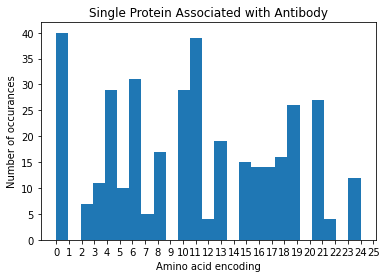

In [ ]:
plt.hist(X[0],25)
plt.xticks(np.arange(0,26,1))
plt.xlabel("Amino acid encoding")
plt.ylabel("Number of occurances")
plt.title("Single Protein Associated with Antibody")
plt.show() # This will create a histogram with the number of occurances for each respective number in the first element of list X

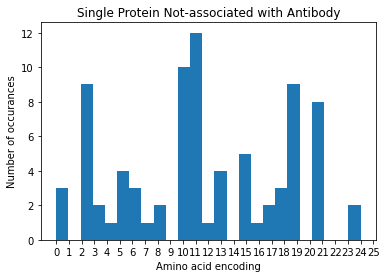

In [ ]:
plt.hist(Y[0],25)
plt.xticks(np.arange(0,26,1))
plt.xlabel("Amino acid encoding")
plt.ylabel("Number of occurances")
plt.title("Single Protein Not-associated with Antibody")
plt.show()

In [8]:
np.mean(X[0]),np.std(X[0]) #meaningful?

(10.829268292682928, 6.93606964110298)

In [9]:
# Can a numeric conversion of nominal letters (amino acids) have an associated meaning? 
# Is there an order to the letters in an amino acid sequence? 
# Why not just use numbers?
chr(int(round(np.mean(X[0])+97))) # does this mean l is our center letter?
# I do not believe that we can apply the same logic to a standard deviation

'l'

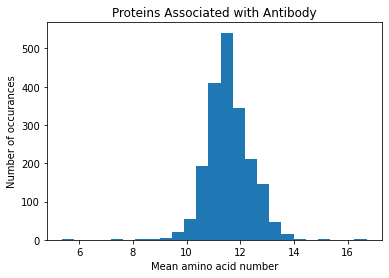

In [7]:
Means_X = []

for i, seq in enumerate(X):
  Means_X.append(np.mean(X[i]))

plt.hist(Means_X,25)
plt.xlabel("Mean amino acid number")
plt.ylabel("Number of occurances")
plt.title("Proteins Associated with Antibody")
plt.show() # This will create a histogram of the means of the amino acid sequences. As we would expect, these means appear normally distributed

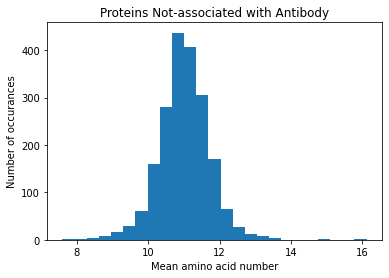

In [11]:
Means_Y = []

for i, seq in enumerate(Y):
  Means_Y.append(np.mean(Y[i]))

plt.hist(Means_Y,25)
plt.xlabel("Mean amino acid number")
plt.ylabel("Number of occurances")
plt.title("Proteins Not-associated with Antibody")
plt.show()

In [12]:
# Using a K-S test 
# we can see that the means of amino acid sequences within proteins associated with 'anibody' is significantly different than the means of amino acid sequences within proteins not associated witht he word 'antibody'
from scipy.stats import ks_2samp

ks_2samp(Means_X, Means_Y)

Ks_2sampResult(statistic=0.3155, pvalue=2.3415567591665026e-88)

In [13]:
np.array(X[0]).shape

(369,)

Find lengths of all proteins:

In [6]:
# Loop through proteins and find the length of the animo acid sequence in each
X_lengths = [len(s) for s in X]
Y_lengths = [len(s) for s in Y]

X_lengths[0],Y_lengths[0]

(369, 82)

In [14]:
np.max(X_lengths) # Find the maximum number of amino acids present in the proteins associated with 'antibody'

5654

In [15]:
np.max(Y_lengths) # Find the maximum number of amino acids present in the proteins not associated with 'antibody'

3987

In [16]:
np.min(X_lengths) # Find the minimum number of amino acids present in the proteins associated with 'antibody'

5

In [17]:
np.min(Y_lengths) # Find the minimum number of amino acids present in the proteins not associated with 'antibody'

8

In [18]:
[np.mean(X_lengths), np.std(X_lengths)]

[558.303, 626.3814438431266]

In [19]:
[np.mean(Y_lengths), np.std(Y_lengths)]

[397.232, 324.0550449784727]

Text(0.5, 1.0, 'Proteins Associated with Antibody')

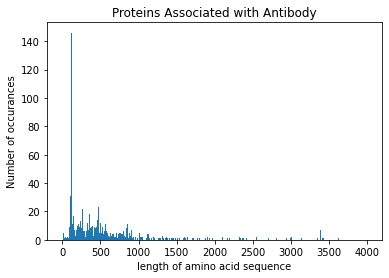

In [20]:
plt.hist(X_lengths,bins=1000,range=(0,4000)); # plot the lengths of each of the 2000 selected proteins associated with 'antibody'
plt.xlabel("length of amino acid sequence")
plt.ylabel("Number of occurances")
plt.title("Proteins Associated with Antibody")

Text(0.5, 1.0, 'Proteins Not-associated with Antibody')

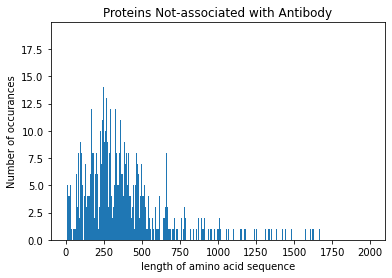

In [21]:
plt.hist(Y_lengths,bins=1000,range=(0,2000)); # It appears as if the length of proteins associates with antibody have longer lengths and are more widely distributed than those not associated with antibody
plt.xlabel("length of amino acid sequence")
plt.ylabel("Number of occurances")
plt.title("Proteins Not-associated with Antibody")